<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-47/blob/main/Reto_Entrega1_Equipo47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Reto:  Entrega 1

## Materia: Ciencia y analítica de datos

Profa. María de la Paz Rico

Prof. Roberto Antonio Guevara González

## Nombres: Adriana Camarillo Durán, Laura Munoz Hernandez

## Matrícula: A01551139, A01167496

Fecha de entrega: 16/11/2022

# Librerías

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing, cluster

#import geopandas as gpd
#from shapely.geometry import Point

#%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

# Exploración y limpieza de datos


In [86]:
pd.set_option('display.max_columns', None)

In [87]:
df_subterraneas = pd.read_csv('Bases_Datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv')
df_subterraneas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [88]:
df_subterraneas.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [89]:
df_subterraneas.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De lo anterior podemos observar que la variable SDT_mg/L está llena de valores nulos, por lo que no nos sirve y la eliminaremos. Las variables PERIODO, CLAVE y SITIO son prácticamente iguales para todas las observaciones por lo que también podemos eliminarlas. 

Por otro lado, Las variables ESTADO y MUNICIPIO están directamente relacionadas con la latitud y longitud por lo que no consideramos necesario mantenerlas en la base. 

También observamos que las 4 variables numéricas que quedan tienen medias y medianas similares, por lo que podemos usar el promedio para tratar valores nulos.

In [90]:
df_subterraneas.drop(['SDT_mg/L', 'PERIODO','CLAVE','SITIO'], axis=1, inplace= True)


Un vistazo inicial de los datos, parece indicar que podemos dividir las variables en los siguientes grupos:

Variables binarias:

In [91]:
vars_binarias = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB', 'CUMPLE_CON_MN','CUMPLE_CON_FE'] #A15

Variables ordinales:

In [92]:
vars_ordinales = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE'] 

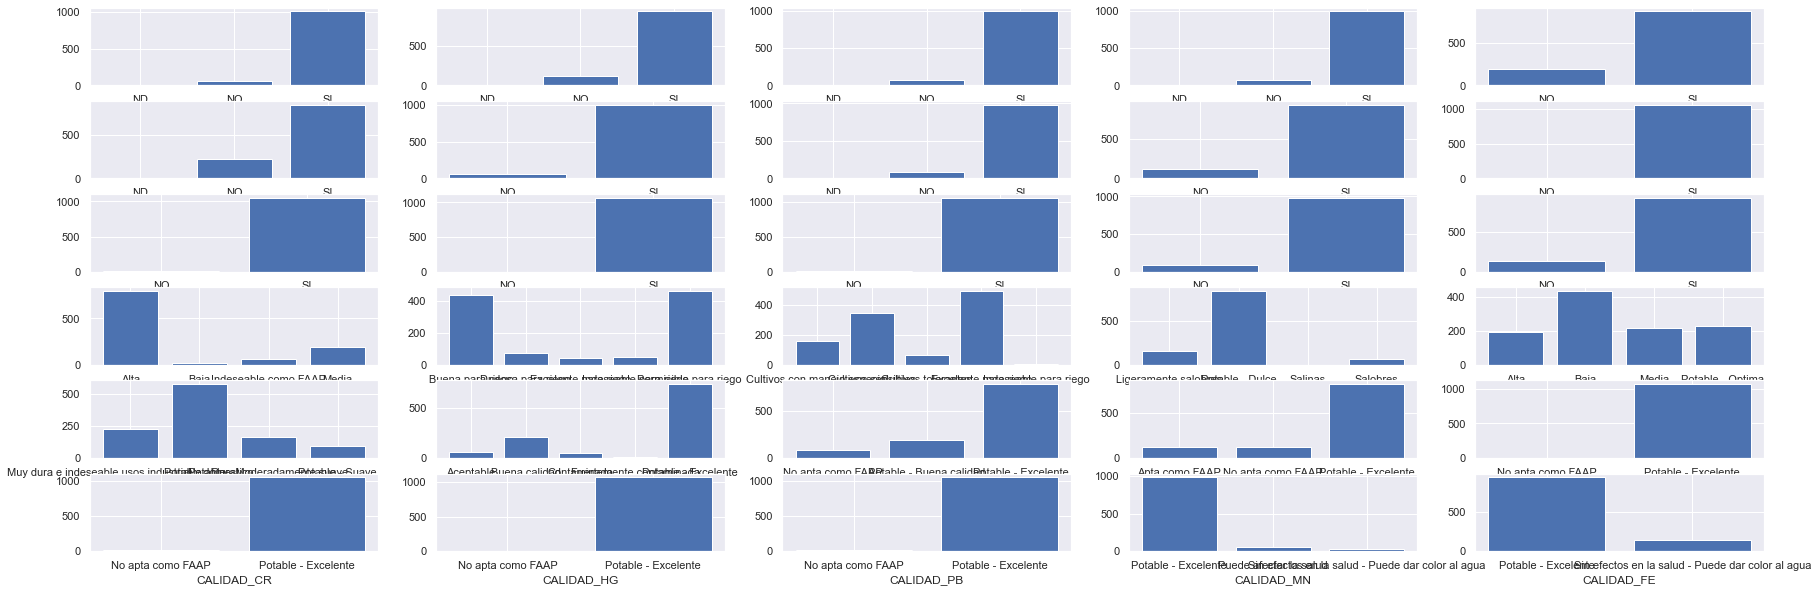

In [93]:
df_vars = vars_binarias + vars_ordinales
sns.set(rc = {'figure.figsize':(30, 10)})
fig, axes = plt.subplots(6, 5)

for k in range(len(df_vars)): 
    plt.subplot(6, 5, k+1)
    try:
        Transf0 = df_subterraneas.groupby(df_vars[k]).SEMAFORO.count().reset_index()
    except:
        Transf0 = df_subterraneas.groupby(df_vars[k]).CALIDAD_FE.count().reset_index()
    try:
        plt.bar(Transf0.iloc[:,0].astype(int).astype(str), Transf0.iloc[:,1])
    except:
        plt.bar(Transf0.iloc[:,0].astype(str), Transf0.iloc[:,1])

    plt.xlabel(df_vars[k])

Variables categóricas:

In [94]:
vars_categoricas = ['ORGANISMO_DE_CUENCA', 'ACUIFERO', 'SUBTIPO'] 

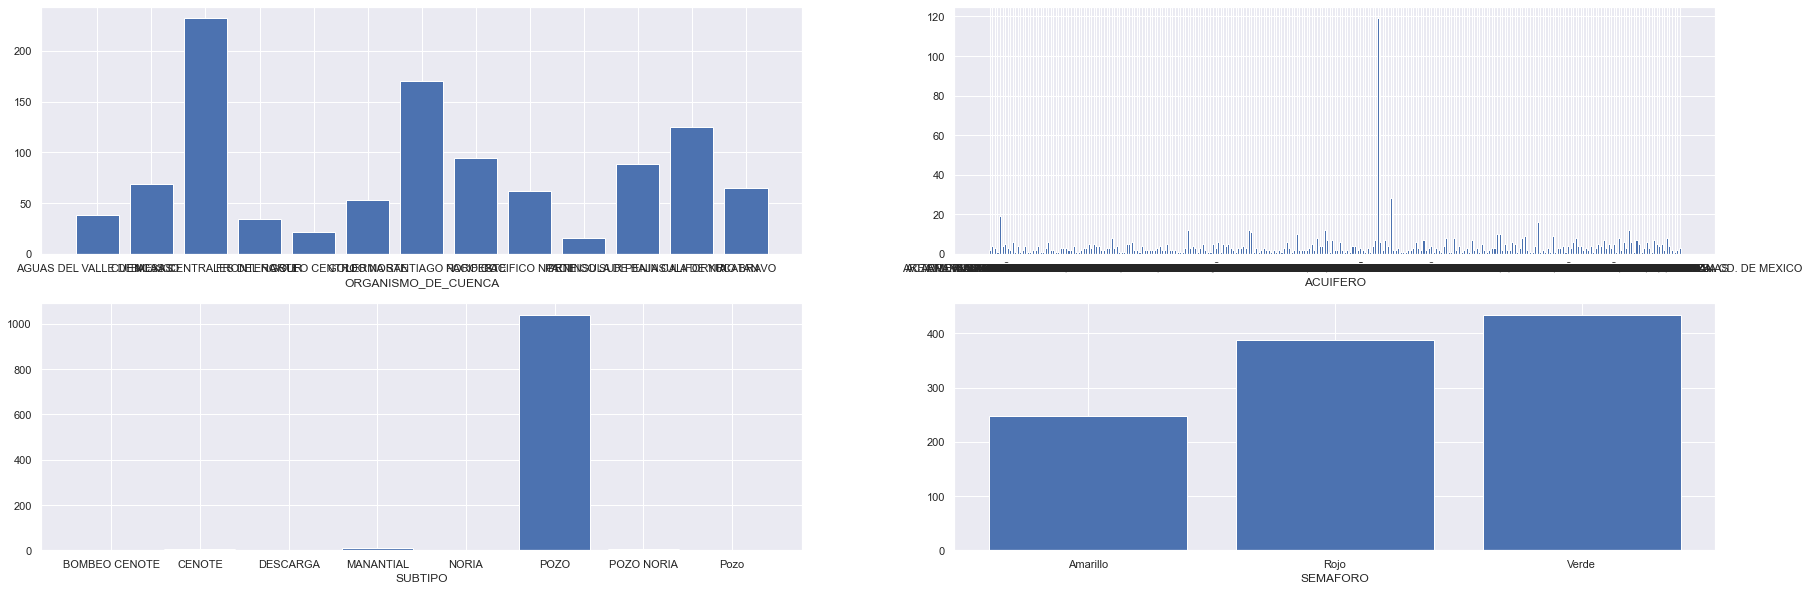

In [95]:
df_vars = vars_categoricas + ['SEMAFORO']
sns.set(rc = {'figure.figsize':(30, 10)})
fig, axes = plt.subplots(2, 2)

for k in range(len(df_vars)): 
    plt.subplot(2, 2, k+1)
    try:
        Transf0 = df_subterraneas.groupby(df_vars[k]).SEMAFORO.count().reset_index()
    except:
        Transf0 = df_subterraneas.groupby(df_vars[k]).CALIDAD_FE.count().reset_index()
    try:
        plt.bar(Transf0.iloc[:,0].astype(int).astype(str), Transf0.iloc[:,1])
    except:
        plt.bar(Transf0.iloc[:,0].astype(str), Transf0.iloc[:,1])

    plt.xlabel(df_vars[k])

Las variables SUBTIPO y ACUIFERO no parecen dar mucha información para discriminar observaciones, por lo que también las eliminamos.

In [96]:
df_subterraneas.drop(['ACUIFERO','SUBTIPO'], axis=1, inplace= True)

In [97]:
vars_categoricas = ['ORGANISMO_DE_CUENCA'] 

Variables numéricas continuas:

In [98]:
vars_numericas = ['LONGITUD','LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm']

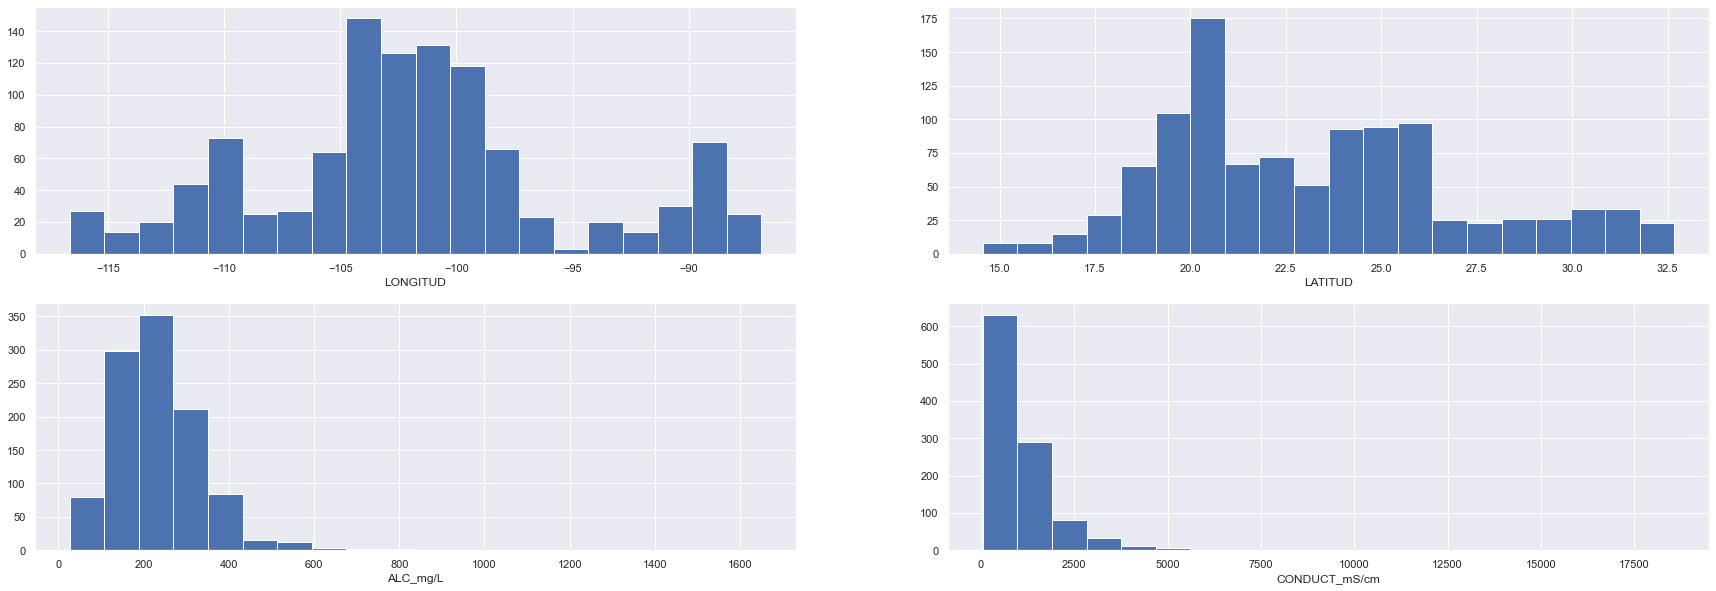

In [101]:
df_vars = vars_numericas
sns.set(rc = {'figure.figsize':(30, 10)})
fig, axes = plt.subplots(2, 2)

for k in range(len(df_vars)): 
    plt.subplot(2, 2, k+1)
    if len(df_subterraneas[df_vars[k]].unique())>=20:
      Transf0 = df_subterraneas[df_vars[k]] 
      try:
        plt.hist(Transf0, bins=20)
      except:
        print(df_vars[k])#plt.hist(Transf0.astype(float), bins=20)

    plt.xlabel(df_vars[k])

Las siguientes variables cuentan con al menos un valor nulo:

In [17]:
NULLS= df_subterraneas.isnull().any()
NULLS[NULLS==True]

ALC_mg/L             True
CALIDAD_ALC          True
CONDUCT_mS/cm        True
CALIDAD_CONDUC       True
SDT_M_mg/L           True
CALIDAD_SDT_ra       True
CALIDAD_SDT_salin    True
DUR_mg/L             True
CALIDAD_DUR          True
N_NO3_mg/L           True
CALIDAD_N_NO3        True
CONTAMINANTES        True
dtype: bool

Como se mencionó anteriormente las variables ALC_mg/L, CONDUCT_mS/cm, SDT_mg/L pueden ser llenadas con el promedio, mientras que las variables categóricas se pueden tratar con la moda.

Al graficar la matriz de correlación, 

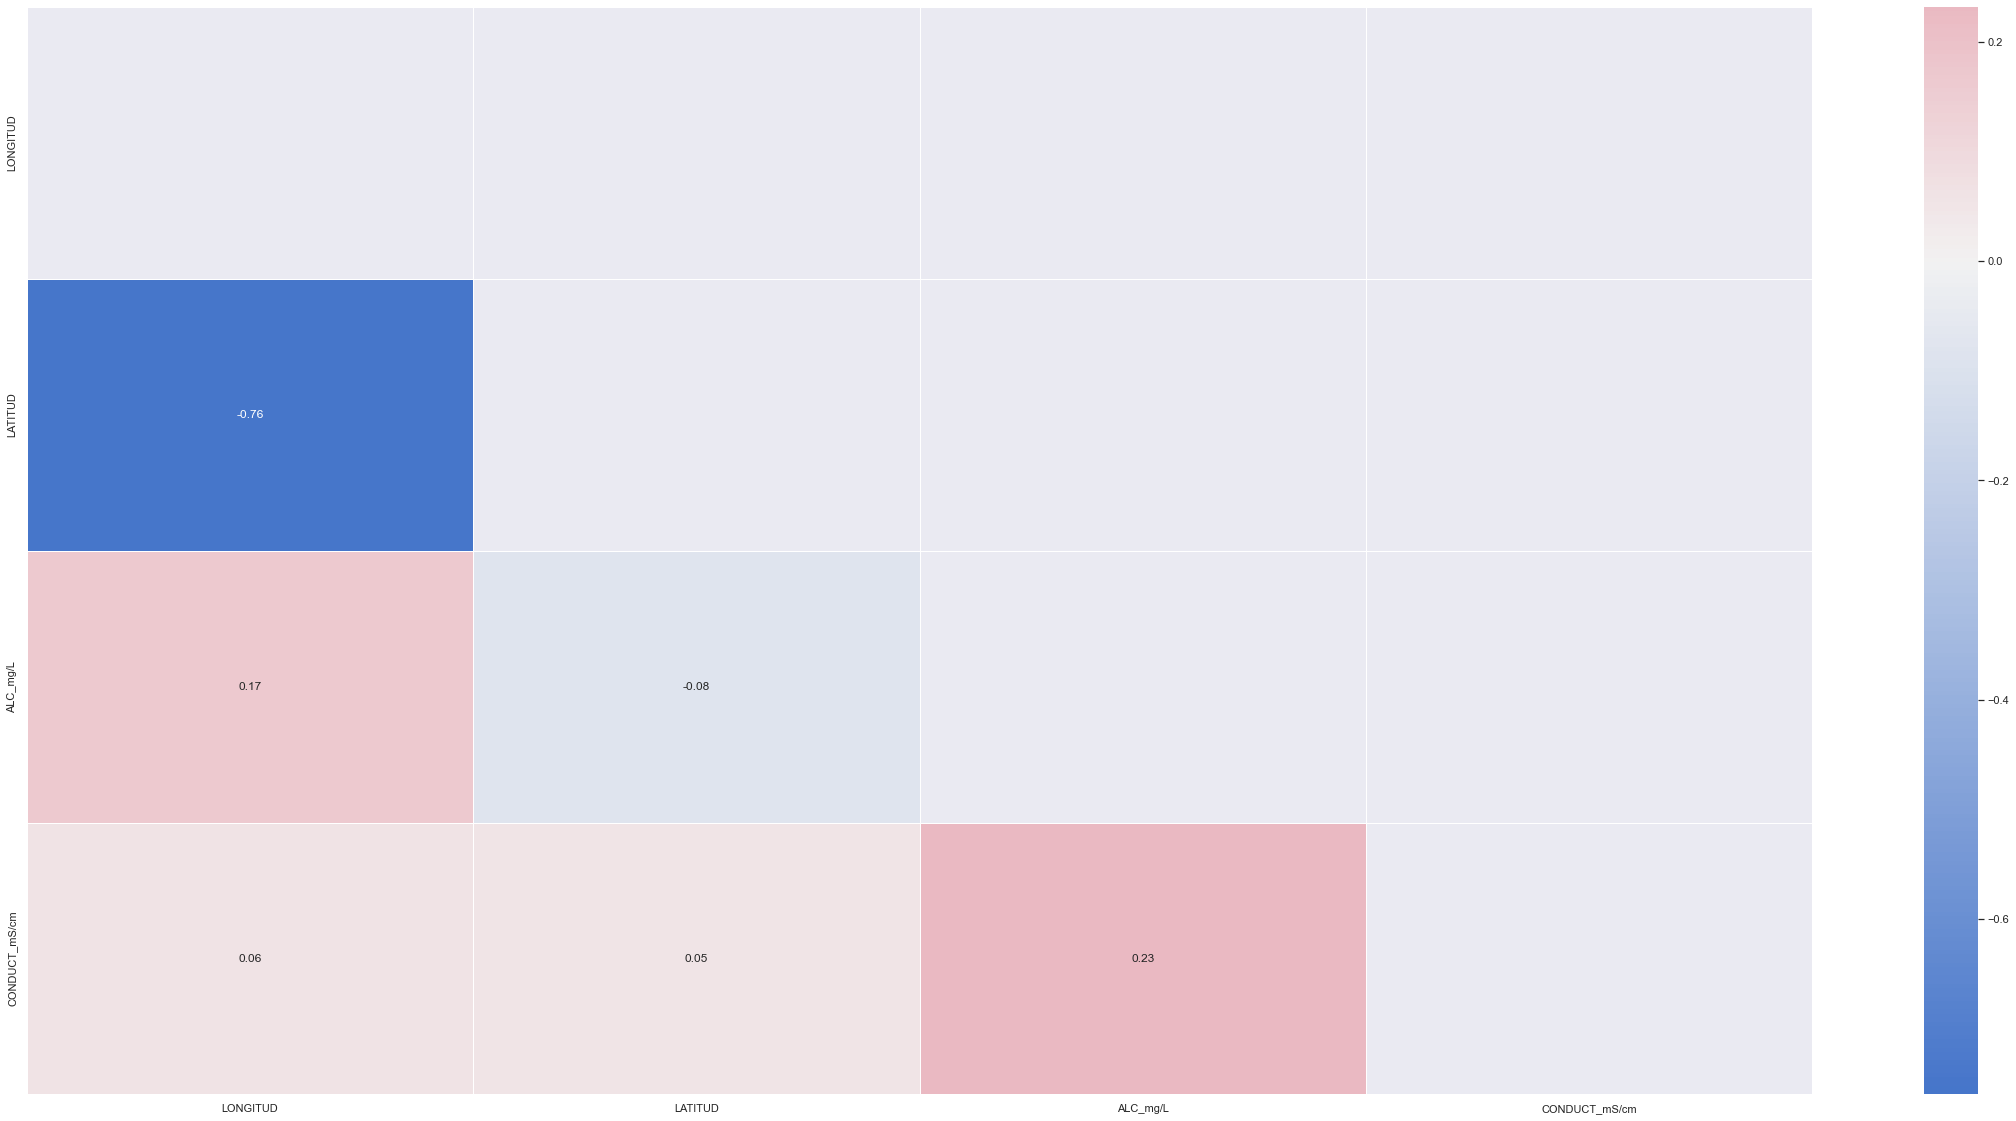

In [104]:
# Matriz de correlación
matriz_corr = df_subterraneas.corr()

mask = np.zeros_like(matriz_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(255, 6, as_cmap=True)

figure = sns.heatmap(matriz_corr, mask=mask, cmap=cmap,
                     center=0, linewidths=0.5,
                     annot=True, fmt='.2f'
                     )

# K-means

In [13]:
X = df_subterraneas[['LATITUD','LONGITUD']]

In [14]:
# Método del codo para identificar el número de clusters
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [15]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6.338194963880917
2 : 4.655048097690132
3 : 3.1487607197605625
4 : 2.3923082514184673
5 : 2.215106009933857
6 : 1.8862028833258029
7 : 1.7161103173427816
8 : 1.5575154693891857
9 : 1.426873185190523


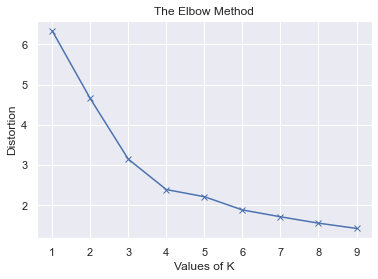

In [16]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [ ]:
#world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#world = world.set_index("iso_a3")

#world.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,CLUSTER,CENTROIDS
108,DLCHI407,JIMENEZ-CAMARGO 3,RIO BRAVO,CHIHUAHUA,ALLENDE,JIMENEZ-CAMARGO,POZO,-105.437120,26.915340,2020,284.48,Alta,561.0,Buena para riego,NaN,389.2,Excelente para riego,Potable - Dulce,0.8732,Potable - Optima,280.5618,Potable - Dura,<1.1,Potable - Excelente,1.270051,Potable - Excelente,0.0176,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,2,0
647,OCCCN5217M1,POZO SAN AGUSTIN,CUENCAS CENTRALES DEL NORTE,DURANGO,MAPIMI,CEBALLOS,POZO,-104.329580,26.367150,2020,198.90,Alta,2420.0,Dudosa para riego,NaN,2201.4,Cultivos tolerantes,Salobres,1.0704,Potable - Optima,813.522,Muy dura e indeseable usos industrial y domestico,<1.1,Potable - Excelente,28.901196,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0022,Potable - Excelente,0.0829,Potable - Excelente,Rojo,"CONDUC,SDT_ra,SDT_salin,DT,NO3,",SI,NO,NO,NO,SI,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI,2,0
914,OCPBC4371,POZO NO. R-89 EJIDO HERMOSILLO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA,MEXICALI,VALLE DE MEXICALI,POZO,-114.905833,32.501378,2020,206.91,Alta,2185.0,Dudosa para riego,NaN,2978,Cultivos tolerantes,Salobres,0.2606,Baja,1410.3813,Muy dura e indeseable usos industrial y domestico,9,Buena calidad,0.063311,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,1.449,Puede afectar la salud,1.793,Sin efectos en la salud - Puede dar color al agua,Amarillo,"CONDUC,SDT_ra,SDT_salin,DT,MN,FE,",SI,NO,NO,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI,NO,NO,3,0
377,DLMIC1613,LAURELES (POZO CD. DEL SOL II),LERMA SANTIAGO PACIFICO,MICHOACAN DE OCAMPO,LA PIEDAD,LA PIEDAD,POZO,-102.033970,20.374620,2020,196.00,Alta,801.0,Permisible para riego,NaN,500.2,Cultivos sensibles,Potable - Dulce,10.5832,Alta,24.8725,Potable - Suave,<1.1,Potable - Excelente,0.082995,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0348,Potable - Excelente,0.1118,Potable - Excelente,Rojo,"FLUO,",SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,5,0
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,229.99,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,5,0


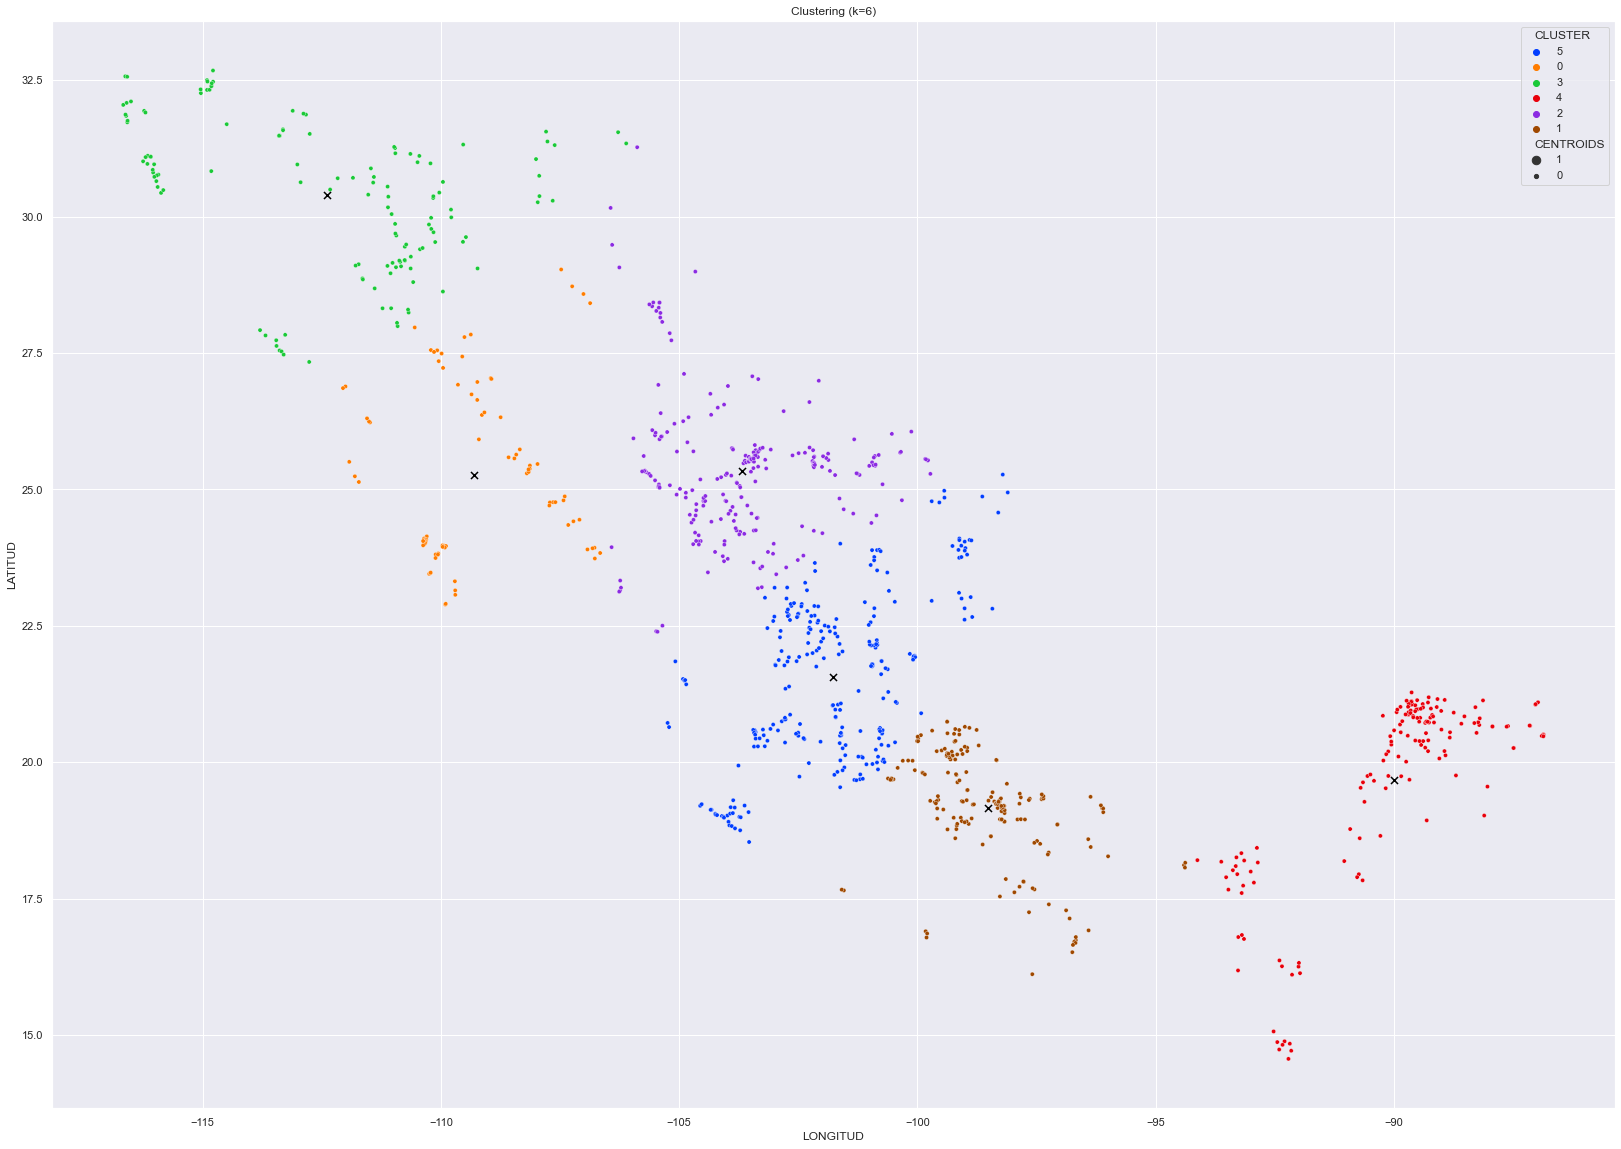

In [19]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')


## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

dtf_X["centroids"] = 0

df_subterraneas[["CLUSTER","CENTROIDS"]] = dtf_X[["cluster","centroids"]]
df_subterraneas.CLUSTER = df_subterraneas.CLUSTER.astype(str)
display(df_subterraneas.sample(5))

# plot
fig, ax = plt.subplots(1,figsize=(28,20))
#world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
sns.scatterplot(x="LONGITUD", y="LATITUD", data=df_subterraneas, 
                palette=sns.color_palette("bright",k),
                hue='CLUSTER', size="CENTROIDS", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,1], th_centroids[:,0], s=50, c='black', 
           marker="x")

## Resultados